Домашняя работа №2

Смолий Юрий Михайлович


*Благодарю преподавателей за предоставленные коды программ , которые используются для выполнения данной работы.*

1. Добавить Bias и посчитать для них градиенты.
2. Сравнить градинеты с тем, как считает PyTorch AutoGrad.

In [204]:
import numpy as np
import torch

import matplotlib.pyplot as plt

import warnings         
warnings.filterwarnings("ignore")

%matplotlib inline

In [280]:

dtype = torch.float 
device = torch.device("cpu") 
# device = torch.device("cuda:0") # Uncomment this to run on GPU


In [281]:
batch_size = 64
input_size = 3 # число переменных на входе
hidden_size = 2 # число переменных во втором слое
output_size = 1 # число переменных на выходе

In [289]:
# Create random input and output data
x = torch.randn(batch_size, input_size, device=device, dtype=dtype)
y = torch.randn(batch_size, output_size, device=device, dtype=dtype)

# Randomly initialize weights
w1_ = torch.randn(input_size, hidden_size, device=device, dtype=dtype)#, requires_grad=True)
w2_ = torch.randn(hidden_size, output_size, device=device, dtype=dtype)#, requires_grad=True)


w01_ = torch.rand(1, hidden_size, device=device, dtype=dtype)#, requires_grad=True)
w02_ = torch.rand(1, output_size, device=device, dtype=dtype)#, requires_grad=True)

# здесь соберем лосы
loss1 = []
loss2 = []
loss3 = []

print(w1_)
print(w2_)
print(w01_)
# три набора весов - для каждой переменной
# каждый набор - два веса - для первого и воторого слоя


tensor([[ 0.5196, -1.8175],
        [-0.2766,  0.0907],
        [-0.1337, -1.9676]])
tensor([[-0.9429],
        [-0.7460]])
tensor([[0.6144, 0.5965]])


In [290]:
w1 = w1_.clone().detach()
w2 = w2_.clone().detach()
w01 = w01_.clone().detach()
w02 = w02_.clone().detach()


learning_rate = 1e-6
for t in range(500):
    # Форвард проход
    h_1 = x.mm(w1) # первое что делаем это умножение весов на Х
    #  на выходе получим две выходные переменные в кол-ве наблюдений = размеру батча
    # получаем двойной вектор высотой в размер батча 
    h_relu = h_1.clamp(min=0) # применяем нелинейность
    # функция релу, все знаяения меньше нуля делает = 0
    out = h_relu.mm(w2) # нелинейный выход умножаем на веса
    # получаем регрессионные предсказания.
    
    # посчитаем loss
    loss1.append((out - y).pow(2).sum().item())
    
    # Backward проход: 
    dloss_dout = 2 * (out - y) # вектор
    
    grad_w2 = h_relu.t().mm(dloss_dout) # промежуточные две переменные
#     умножаем на вектор получаем вектор из двух чисел
    
    grad_h_relu = dloss_dout.mm(w2.t()) 
    # получаем двойной вектор высотой в размер батча 
    
    grad_h_relu[h_1 < 0] = 0
    
    grad_w1 = x.t().mm(grad_h_relu)
    
    
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2
    if t % 100 == 99:
        print('Loss on iteration {} = {}'.format(t, loss1[t]))

loss1[t]

Loss on iteration 99 = 284.326904296875
Loss on iteration 199 = 252.37136840820312
Loss on iteration 299 = 225.56051635742188
Loss on iteration 399 = 202.97845458984375
Loss on iteration 499 = 183.8589324951172


183.8589324951172

##### Теперь добавим bias

In [291]:
w1 = w1_.clone().detach()
w2 = w2_.clone().detach()
w01 = w01_.clone().detach()
w02 = w02_.clone().detach()


learning_rate = 1e-6
for t in range(500):
    # Форвард проход: compute predicted y

    h_1 = x.mm(w1) + w01

    h_relu = h_1.clamp(min=0) # применяем нелинейность

    out = h_relu.mm(w2) + w02 # нелинейный выход умножаем на веса

    # посчитаем loss
    loss2.append((out - y).pow(2).sum().item())
    
    # Backward проход: 
    dloss_dout = 2 * (out - y) # вектор с разными числами
    dloss_drelu = dloss_dout.mm(w2.t()) 
    
    grad_w2 = h_relu.t().mm(dloss_dout) 
    grad_w02 = torch.ones(output_size, batch_size, device=device, dtype=dtype).mm(dloss_dout)

    dloss_drelu[h_1 < 0] = 0
    grad_w1 = x.t().mm(dloss_drelu)
    grad_w01 = torch.ones(output_size, batch_size, device=device, dtype=dtype).mm(dloss_drelu).reshape(1, 2)
    
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2
    w01 -= learning_rate * grad_w01
    w02 -= learning_rate * grad_w02
    
    if t % 100 == 99:
        print('Loss on iteration {} = {}'.format(t, loss2[t]))

loss2[t]

Loss on iteration 99 = 351.53125
Loss on iteration 199 = 291.79901123046875
Loss on iteration 299 = 245.837646484375
Loss on iteration 399 = 210.21722412109375
Loss on iteration 499 = 182.2896728515625


182.2896728515625

##### Autograd

In [292]:
# посмотрим как работает "автоград"
w1 = torch.tensor(w1_, requires_grad=True)
w2 = torch.tensor(w2_, requires_grad=True)
w01 = torch.tensor(w01_, requires_grad=True)
w02 = torch.tensor(w02_, requires_grad=True)

print(w1)
print(w2)
print(w01)

tensor([[ 0.5196, -1.8175],
        [-0.2766,  0.0907],
        [-0.1337, -1.9676]], requires_grad=True)
tensor([[-0.9429],
        [-0.7460]], requires_grad=True)
tensor([[0.6144, 0.5965]], requires_grad=True)


In [293]:



learning_rate = 1e-6
for t in range(500):
#     реализовываем форвард проход
    y_pred = torch.add(torch.add(x.mm(w1), w01).clamp(min=0).mm(w2) , w02)
    
# считаем лосс
    loss = (y_pred - y).pow(2).sum()
    loss3.append(loss.item())
    
    if t % 100 == 99:
        print(t, loss3[t])
    
    # Теперь подсчет градиентов для весов происходит при вызове backward
#     потом мы говорим, что посчитай градиенты по этому лоссу
    loss.backward()
   
    # Обновляем значение весов, но укзаываем, чтобы PyTorch не считал эту операцию, 
    # которая бы учавствовала бы при подсчете градиентов в chain rule
#     обратиться к знаяениям гардиета .grad
# после расчета градиента туда записывается знаяение градиента.
    with torch.no_grad(): # 
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        w01 -= learning_rate * w01.grad
        w02 -= learning_rate * w02.grad
        
        
        # Теперь обнуляем значение градиентов, чтобы на следующем шаге 
        # они не учитывались при подсчете новых градиентов,
        # иначе произойдет суммирвоание старых и новых градиентов
        w1.grad.zero_()
        w2.grad.zero_()
        w01.grad.zero_()
        w02.grad.zero_()

99 351.53125
199 291.79901123046875
299 245.83766174316406
399 210.2172393798828
499 182.2896728515625


In [294]:
# данная функция позаимствована из тетрадки семинара №2
def plot(histories):
    plt.figure(figsize=(8,6))
    
    for name, val_loss in histories:
        plt.plot(val_loss, label=name)

    plt.legend()

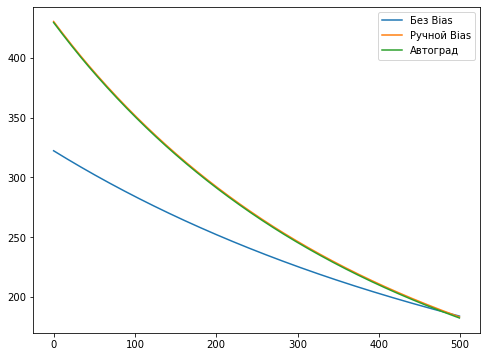

In [296]:
loss22 = [n+0.9 for n in loss2] # маленькое смещение специально добавим, что бы графики не сливались
plot([('Без Bias', loss1), 
      ('Ручной Bias', loss22),
      ('Автоград', loss3)])